In [375]:
import cv2
import numpy as np

In [376]:
img = cv2.imread("images.jpg",0)

In [377]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

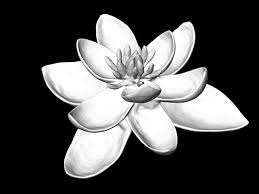

In [378]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [379]:
kernel= np.ones((5,5), np.uint8)

In [380]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [381]:
img_erosion = cv2.erode(img, kernel, iterations=1)

In [382]:
img_erosion

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

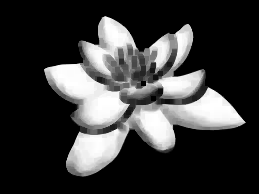

In [383]:

cv2_imshow(img_erosion)

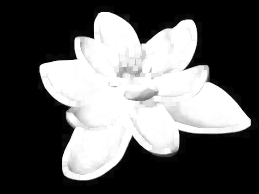

In [384]:
img_dilation = cv2.dilate(img, kernel, iterations=1)
cv2_imshow(img_dilation)

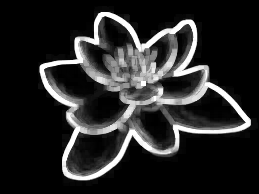

In [385]:
cv2_imshow(img_dilation-img_erosion)

In [386]:
sub= img.copy()

In [387]:
row,column=sub.shape

Mean Filter

In [388]:
for i in range(1,row-1):
  for j in range(1,column-1):
      sub[i][j] = (sub[i-1][j-1]+sub[i-1][j]+sub[i-1][j+1]+sub[i][j-1]+sub[i][j]+sub[i][j+1]+sub[i+1][j-1]+sub[i+1][j]+sub[i+1][j+1])/9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [389]:
sub

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

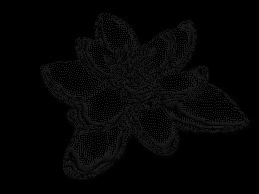

In [390]:
cv2_imshow(sub)

Weighted Average filter

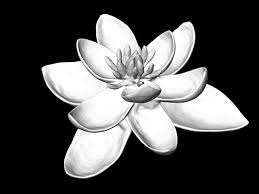

In [391]:
weight = img.copy()
cv2_imshow(weight)

In [392]:
filter = [[1,1,1],[1,2,1],[1,1,1]]
filter[0][0]

1

In [393]:
for i in range(1,row-1):
  for j in range(1,column-1):
    weight[i][j]= weight[i-1][j-1]*filter[0][0]+weight[i-1][j]*filter[0][1]+ weight[i-1][j+1]*filter[0][2]+weight[i][j-1]*filter[1][0]+ weight[i][j]*filter[1][1]+ weight[i][j+1]*filter[1][2]+ weight[i+1][j-1]* filter[2][0]+ weight[i+1][j]*filter[2][1]+ weight[i+1][j+1]*filter[2][2]


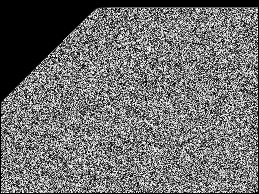

In [394]:
cv2_imshow(weight)

Median filter

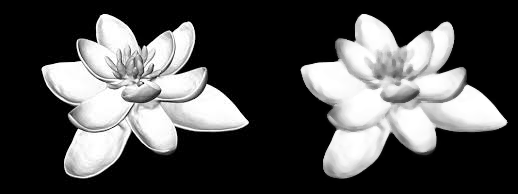

In [395]:
d= []
med=img.copy()
median = cv2.medianBlur(med, 5)
compare = np.concatenate((med, median), axis=1)
cv2_imshow(compare)

##Mirror Image

###Horizontal Flip

In [396]:
flip = img.copy()

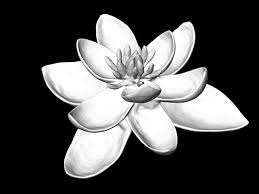

In [397]:
cv2_imshow(flip)

In [398]:
m,n = flip.shape
m

194

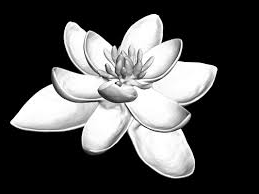

In [399]:
im1 = cv2.flip(flip, 1)
cv2_imshow(im1)

In [400]:
ls = flip.copy()
for i in range(m):
  for j in range(n):
    ls[i][j]= flip[i][n-1-j]


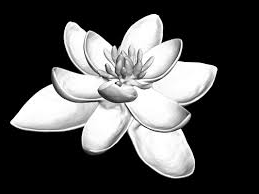

In [401]:
cv2_imshow(ls)

##Vertical Flip

In [402]:
for i in range(m):
  for j in range(n):
    ls[i][j] = flip[m-1-i][j]

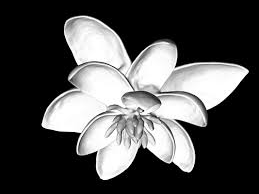

In [403]:
cv2_imshow(ls)

##Fourier Transform

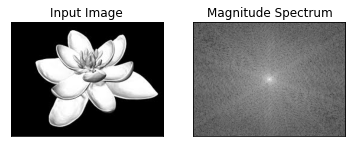

In [404]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
f = np.fft.fft2(img1)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img1, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

##Convolution

In [405]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

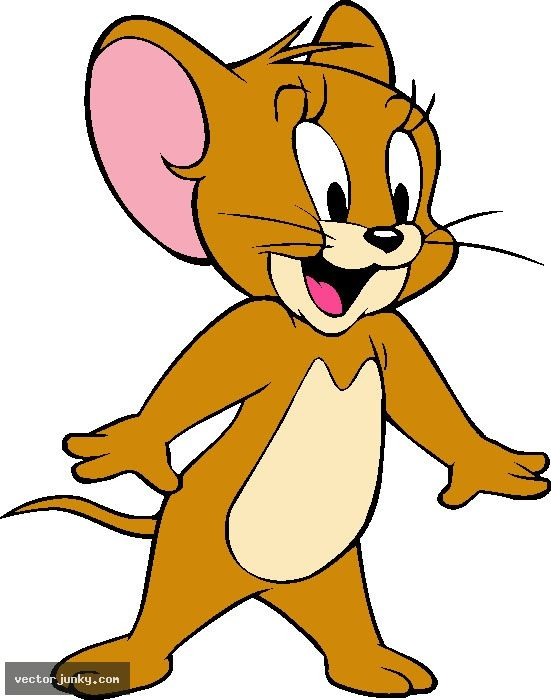

In [406]:
jerry = cv2.imread('jerry.jpg')
cv2_imshow(jerry)

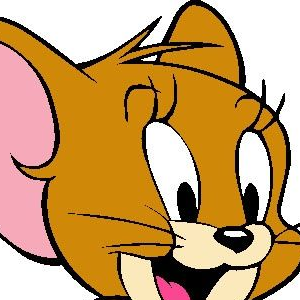

In [407]:
import numpy as np
jerry1 =jerry[0:300, 150:450]
cv2_imshow(jerry1)

In [408]:
e,f = jerry1.shape

ls2 = jerry1.copy()

ValueError: ignored